In [3]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np

# 倍賭け法

In [11]:
def coin_flip() -> bool:
    return np.random.choice([True, False])


# マーチンゲール法を用いたシミュレーション
# ルール
# 1. 初期資産はassets
# 2. 資産が0になるまで続ける
# 3. 一度でも勝負に勝てばTrueを返す, 負けたらFalseを返す
# 4. 負けたら次の勝負では前回の賭け金の2倍を賭ける
# 5. 勝ったら賭け金を1に戻す


def martingale(assets: int, first_bet:int = 1) -> bool:
    BET = first_bet
    while assets > 0:
        if coin_flip():
            assets += BET
            BET = 1
            return True
        else:
            assets -= BET
            BET *= 2

    return False

In [12]:
import japanize_matplotlib


# 初期資産を1から100まで変化させ、各初期資産について50回のシミュレーションを行う
@interact(first_asset=[100, 500, 1000])
def martingale_simulation(first_asset: int):
    win_rates = []
    for initial_assets in range(1, first_asset + 1):
        wins = 0
        for _ in range(50):
            if martingale(initial_assets):
                wins += 1
        win_rate = wins / 50
        win_rates.append(win_rate)

    plt.plot(range(1, first_asset + 1), win_rates)
    plt.xlabel("初期資産")
    plt.ylabel("勝率")
    plt.title("マーチンゲール法によるシミュレーション(初期ベット額: 1)")
    plt.grid()
    plt.show()

interactive(children=(Dropdown(description='first_asset', options=(100, 500, 1000), value=100), Output()), _do…

In [18]:
# 初期資産 1000万円
# 初回ベット額 1万円
FIRST_ASSETS = 10000000
FIRST_BET = 10000

N_SIMULATIONS = 1000
x = np.zeros(N_SIMULATIONS)
for i in range(N_SIMULATIONS):
    # 1年間で1日でも負けたら0を返す
    for day in range(365):
      if not martingale(FIRST_ASSETS, FIRST_BET):
        x[i] = 0
        break
      else:
        x[i] = 1

print(f"勝率: {x.mean()}")
  

勝率: 0.686


# 対数正規分布の確率密度関数

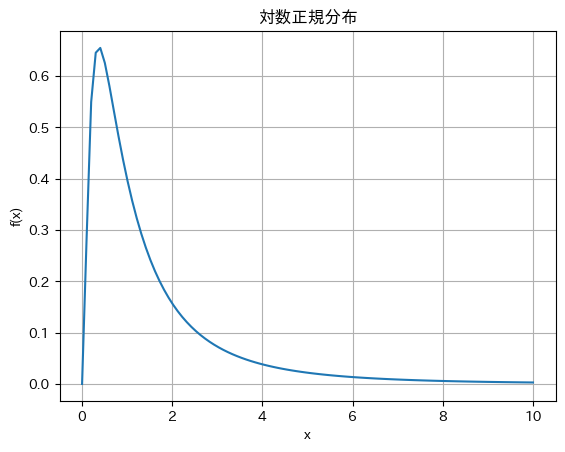

In [6]:
mu = 0
sigma = 1
f = (
    lambda x: 1
    / (np.sqrt(2 * np.pi * sigma**2) * x)
    * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma**2))
)

x = np.linspace(1e-10, 10, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("対数正規分布")
plt.grid()

# パレート分布の確率密度関数

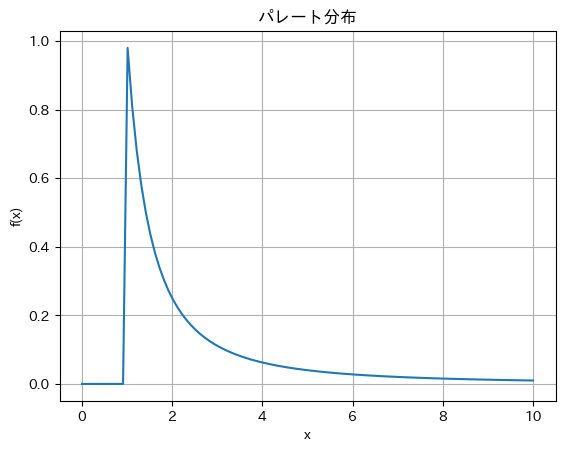

In [7]:
k = 1
alpha = 1


def f(x):
    if x >= k:
        return (k**alpha) * alpha / x ** (alpha + 1)
    else:
        return 0


x = np.linspace(1e-10, 10, 100)
y = [f(x_) for x_ in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("パレート分布")
plt.grid()

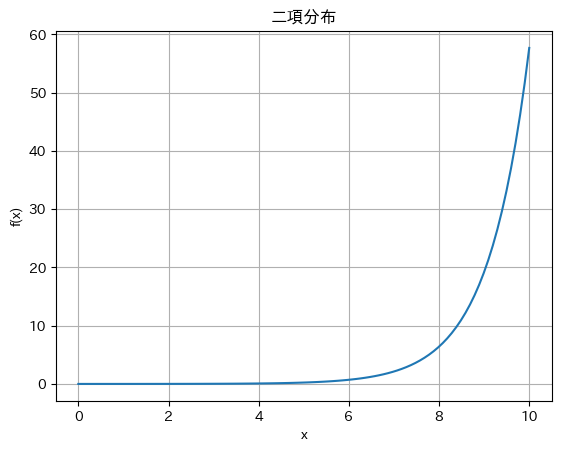

In [8]:
y0 = 1
b = 0.5
n = 10
f = lambda x: y0 * (1 + b)**x *(1-b)**(n-x)

x = np.linspace(0, 10, 100)
y = [f(x_) for x_ in x]
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("二項分布")
plt.grid()
